In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Kaggle\Real_Estate.csv')
df

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [4]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [5]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

<Axes: xlabel='House age'>

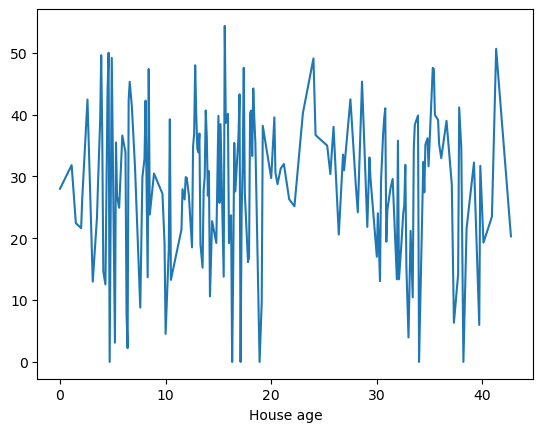

In [6]:
df.groupby(['House age'])['House price of unit area'].mean().plot()

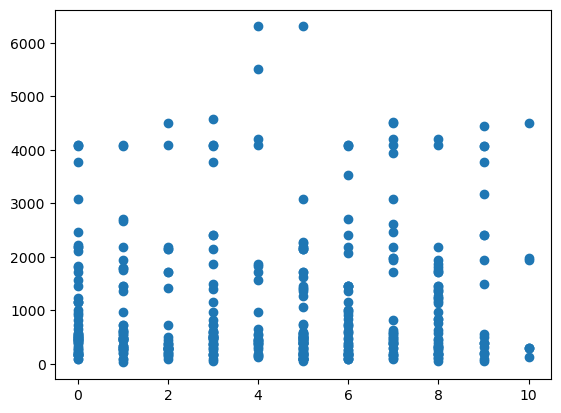

In [7]:
plt.scatter(x= df['Number of convenience stores'], y= df['Distance to the nearest MRT station'])

In [8]:
df['Transaction date'] = pd.to_datetime(df['Transaction date'])
df['Transaction date'] = pd.DatetimeIndex(df['Transaction date']).year

In [9]:
y = df['House price of unit area']
X = df.drop('House price of unit area', axis= 1)

In [10]:
df.corr()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
Transaction date,1.000000,-0.025535,-0.017002,-0.096270,0.024791,0.086737,0.015745
House age,-0.025535,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284
Distance to the nearest MRT station,-0.017002,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579
Number of convenience stores,-0.096270,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763
Latitude,0.024791,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008
Longitude,0.086737,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626
House price of unit area,0.015745,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000


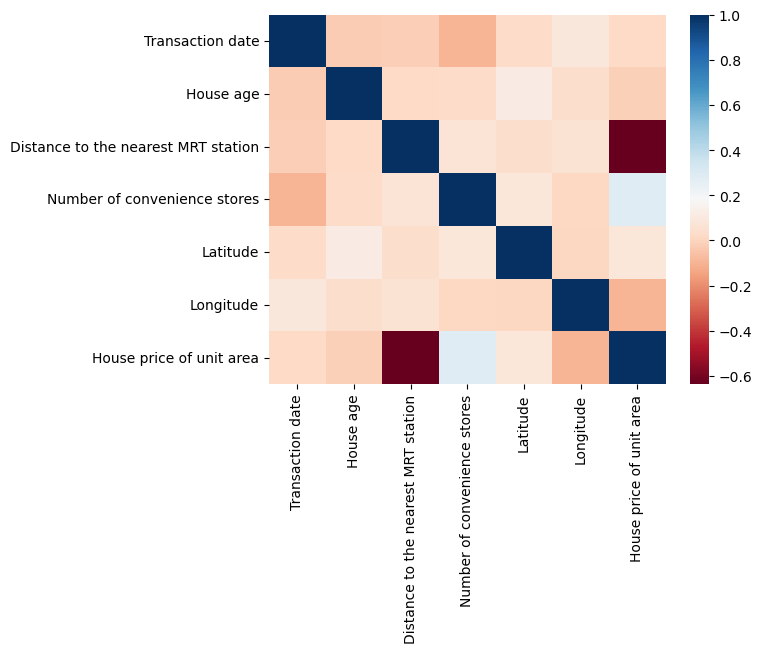

In [11]:
sns.heatmap(df.corr(), cmap='RdBu')
plt.show()

c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

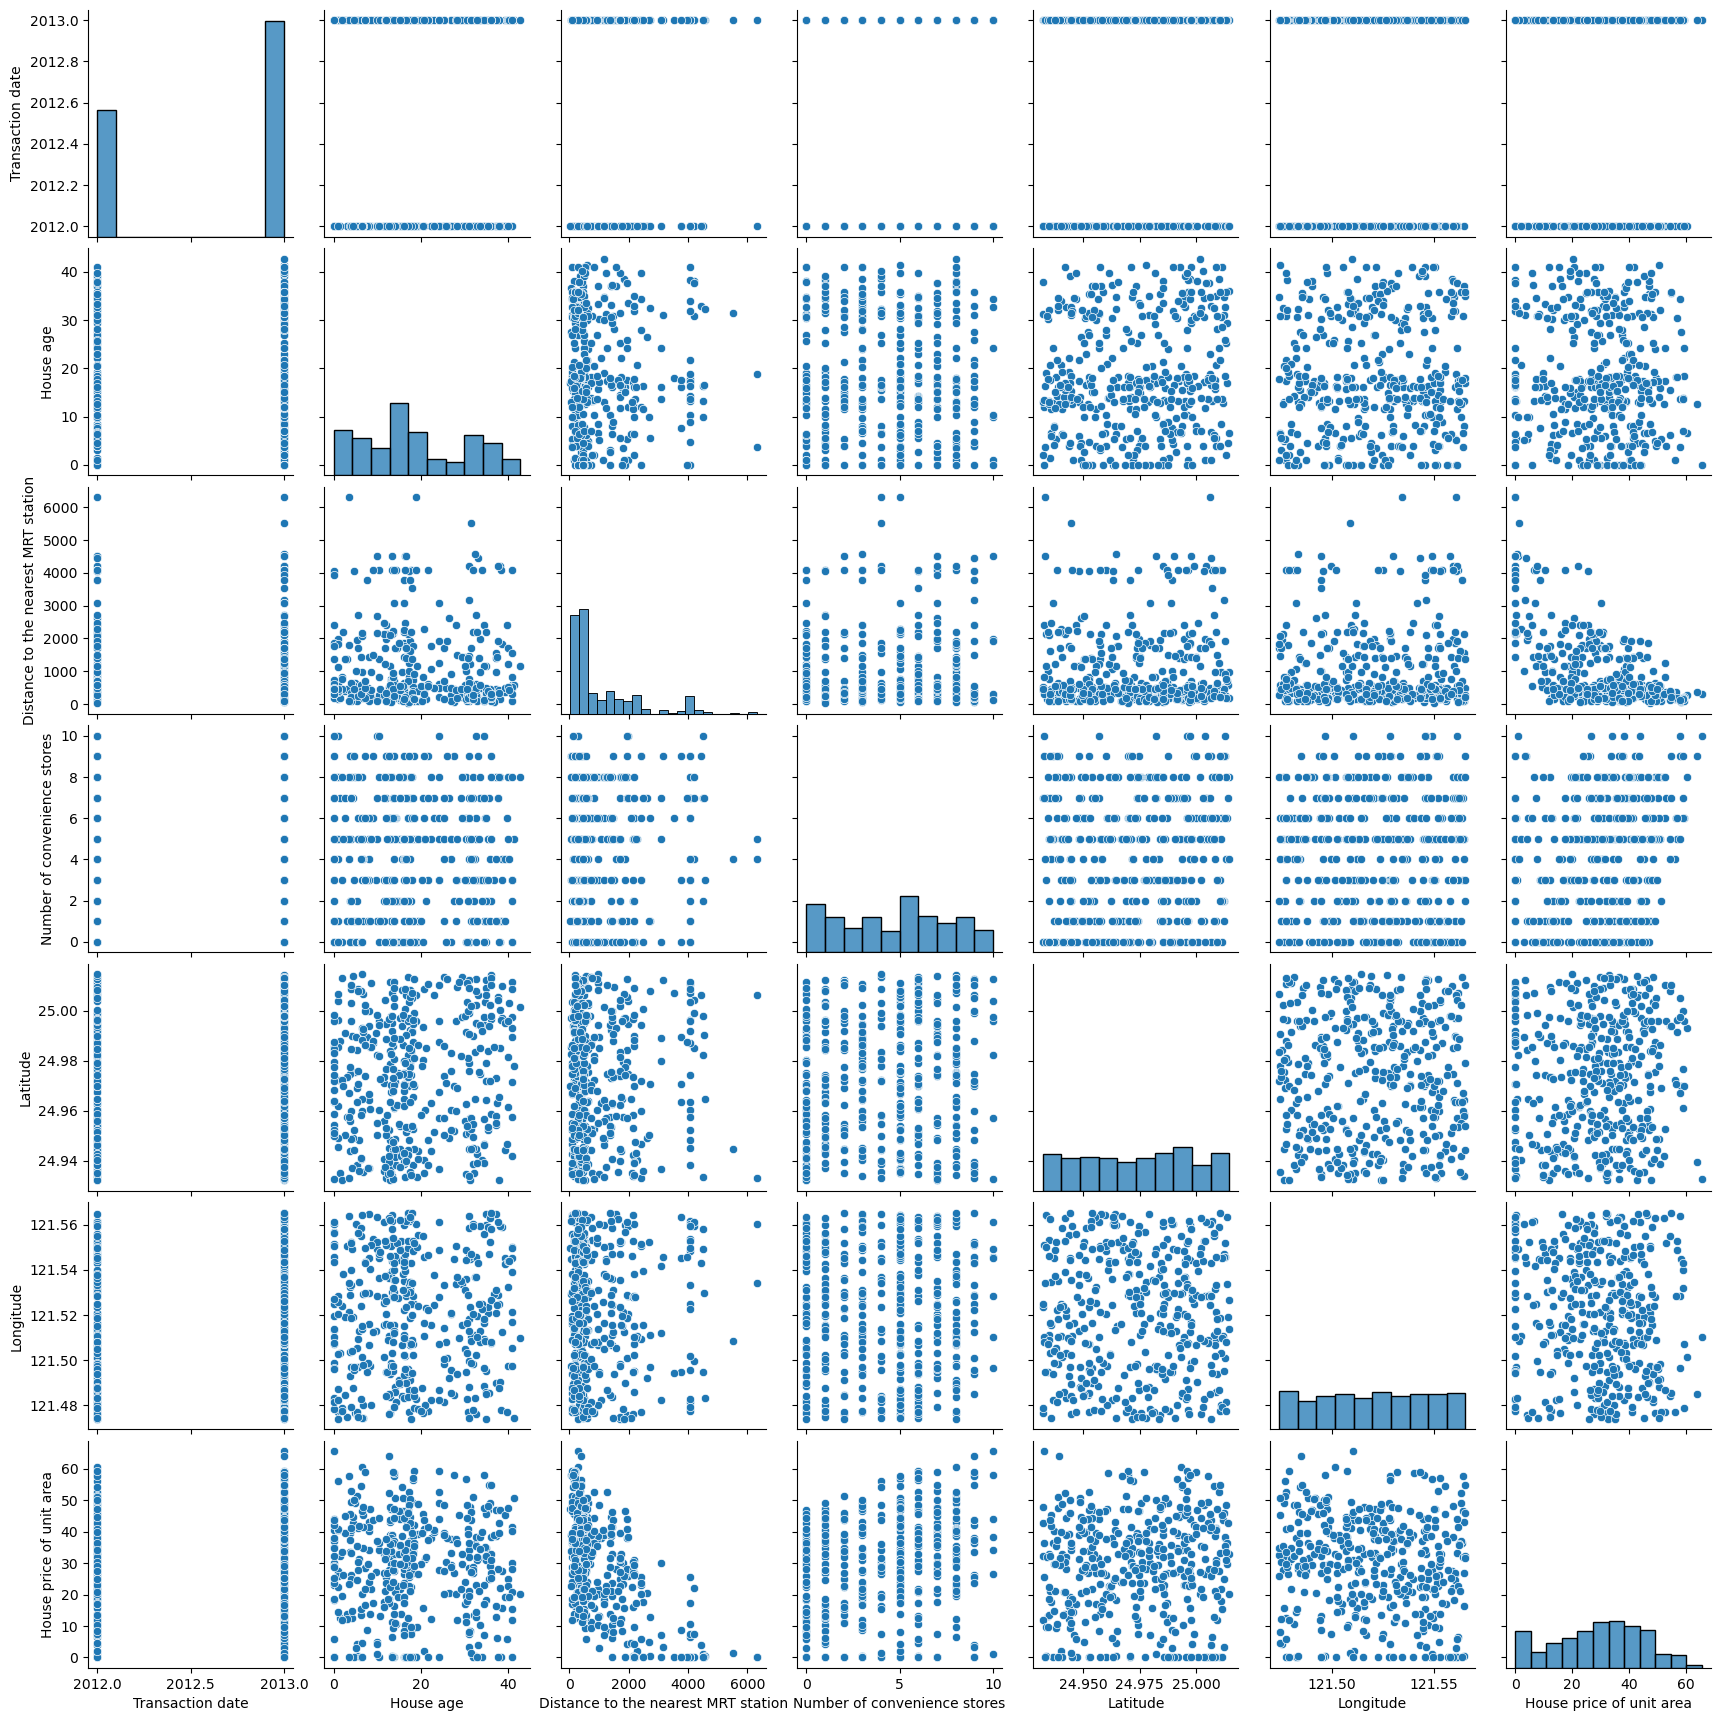

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
from sklearn import model_selection, linear_model

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.3)

# Linear Regression

In [15]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = lr.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = lr.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.47419790164429276
R2_score (train):  0.5426815741885107
R2_score (test):  0.42526366973352625
RMSE:  11.745780663110146


# Lasso Regresson

In [17]:
Lasso = linear_model.Lasso
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)

Lasso(alpha=10)

In [18]:
# Predicting the cross validationscore of the test results
cv_lasso = cross_val_score(estimator=lasso, X=X_train, y=y_train)

# Predicting r2 score of the training set
y_pred_lasso_train = lasso.predict(X_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting r2 score of the testing set
y_pred_lasso_test = lasso.predict(X_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE of the test set results
rmse_lasso = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))

print('CV: ', cv_lasso.mean())
print('r2 score(train): ',r2_score_lasso_train)
print('r2 score(test): ',r2_score_lasso_test)
print('RMSE: ', rmse_lasso)

CV:  0.44701981923052597
r2 score(train):  0.4839318103797645
r2 score(test):  0.3339109313371431
RMSE:  12.644850952461711


# Ridge Regression

In [19]:
Ridge = linear_model.Ridge

ridge = Ridge(alpha=10)
ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [20]:
# Predicting the cross validationscore of the test results
cv_ridge = cross_val_score(estimator=lasso, X=X_train, y=y_train)

# Predicting r2 score of the training set
y_pred_ridge_train = ridge.predict(X_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting r2 score of the testing set
y_pred_ridge_test = ridge.predict(X_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE of the test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))

print('CV: ', cv_ridge.mean())
print('r2 score(train): ',r2_score_ridge_train)
print('r2 score(test): ',r2_score_ridge_test)
print('RMSE: ', rmse_ridge)

CV:  0.44701981923052597
r2 score(train):  0.534038822909477
r2 score(test):  0.4253828175808262
RMSE:  11.7445630986845


# Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)

regressor_poly2 = linear_model.LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [22]:
# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.47419790164429276
R2_score (train):  0.5774568147214441
R2_score (test):  0.3918438515677881
RMSE:  12.08245294012732


# Support Vector Machines

In [43]:
from sklearn.preprocessing import StandardScaler

# Create an object of StandardScaler to independent variables
sc_X = StandardScaler()
sc_y = StandardScaler()

# Standardize the features
X_scaled = sc_X.fit_transform(X_train)

# Reshape the target variable before scaling
y_train_reshaped = y_train.values.reshape(-1, 1)

# Standardize the target variable
y_scaled = sc_y.fit_transform(y_train_reshaped)

In [44]:
# Fitting the SVR Model to the dataset
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', gamma = 'scale')
regressor_svr.fit(X_scaled, y_scaled.ravel())

SVR()

In [48]:
# Predicting Cross Validation Score
cv_svr = cross_val_score(estimator = regressor_svr, X = X_scaled, y = y_scaled.ravel(), cv = 10)

# Predicting R2 Score the Train set results
y_pred_svr_train = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_train)).reshape(-1, 1))
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

# Predicting R2 Score the Test set results
y_pred_svr_test = sc_y.inverse_transform(regressor_svr.predict(sc_X.transform(X_test)).reshape(-1, 1))
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

# Predicting RMSE the Test set results
rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))
print('CV: ', cv_svr.mean())
print('R2_score (train): ', r2_score_svr_train)
print('R2_score (test): ', r2_score_svr_test)
print("RMSE: ", rmse_svr)

CV:  0.35448117358569453
R2_score (train):  0.6200423977358889
R2_score (test):  0.33792766137731733
RMSE:  12.606667053162719


# Decision Tree Regression

In [59]:
# Fitting decios tree model to the dataset
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [60]:
# Predicting the cross validationscore of the test results
cv_dtr = cross_val_score(estimator=model_dtr, X=X_train, y=y_train)

# Predicting r2 score of the training set
y_pred_dtr_train = model_dtr.predict(X_train)
r2_score_dtr_train = r2_score(y_train, y_pred_dtr_train)

# Predicting r2 score of the testing set
y_pred_dtr_test = model_dtr.predict(X_test)
r2_score_dtr_test = r2_score(y_test, y_pred_dtr_test)

# Predicting RMSE of the test set results
rmse_dtr = (np.sqrt(mean_squared_error(y_test, y_pred_dtr_test)))

print('CV: ', cv_dtr.mean())
print('r2 score(train): ',r2_score_dtr_train)
print('r2 score(test): ',r2_score_dtr_test)
print('RMSE: ', rmse_dtr)

CV:  0.3394225359611133
r2 score(train):  0.6294098188442532
r2 score(test):  0.3894051979026415
RMSE:  12.10665350058529


# Random Forest Regression

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 500)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [62]:
# Predicting the cross validationscore of the test results
cv_rf = cross_val_score(estimator=rf, X=X_train, y=y_train)

# Predicting r2 score of the training set
y_pred_rf_train = rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predicting r2 score of the testing set
y_pred_rf_test = rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predicting RMSE of the test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))

print('CV: ', cv_rf.mean())
print('r2 score(train): ',r2_score_rf_train)
print('r2 score(test): ',r2_score_rf_test)
print('RMSE: ', rmse_rf)

CV:  0.4045008521616961
r2 score(train):  0.9230634020317252
r2 score(test):  0.3735527095149258
RMSE:  12.262805188846455


In [63]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Polynomial Regression (2nd)', rmse_poly2, r2_score_poly2_train, r2_score_poly2_test, cv_poly2.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Lasso Regression', rmse_lasso, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Decision Tree Regression', rmse_dtr, r2_score_dtr_train, r2_score_dtr_test, cv_dtr.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [64]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,11.745781,0.542682,0.425264,0.474198
1,Polynomial Regression (2nd),12.082453,0.577457,0.391844,0.474198
2,Ridge Regression,11.744563,0.534039,0.425383,0.354481
3,Lasso Regression,12.644851,0.483932,0.333911,0.447020
4,Support Vector Regression,12.606667,0.620042,0.337928,0.354481
5,Decision Tree Regression,12.106654,0.629410,0.389405,0.339423
6,Random Forest Regression,12.262805,0.923063,0.373553,0.404501


c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


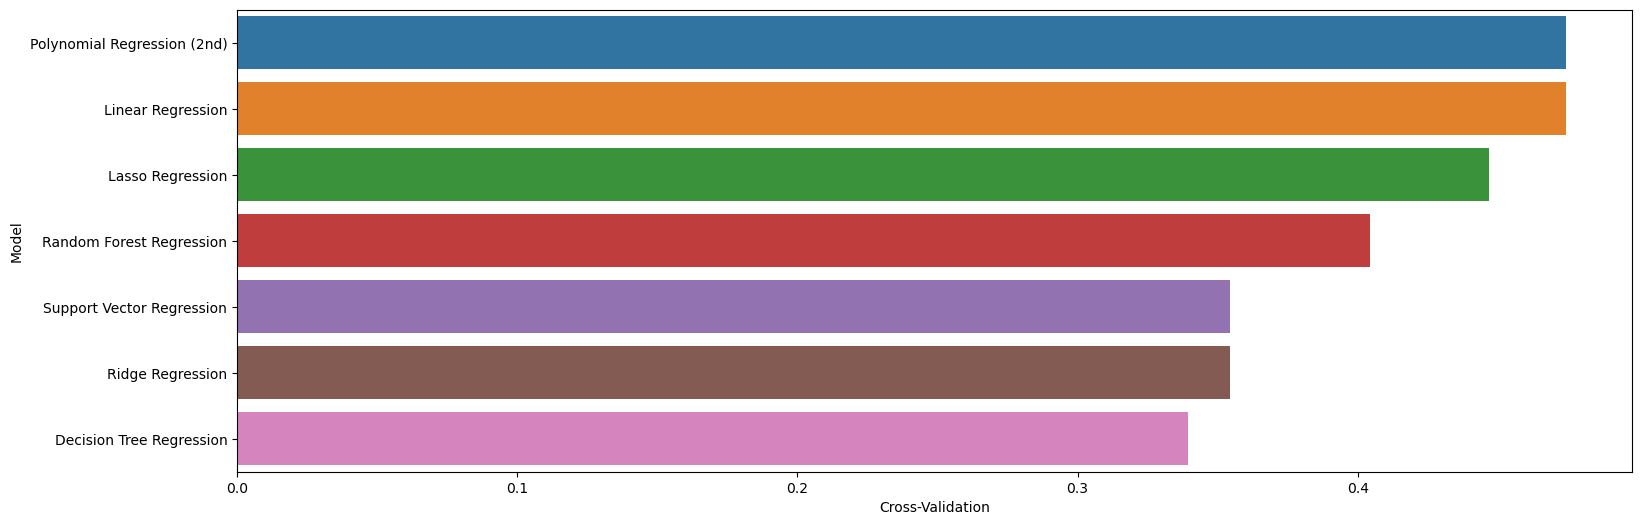

In [78]:
plt.figure(figsize=(18, 6))
plt.subplot(111)  
predict.sort_values(['Cross-Validation'], ascending=False, inplace=True)
sns.barplot(x='Cross-Validation', y='Model', data=predict)
plt.show()


c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


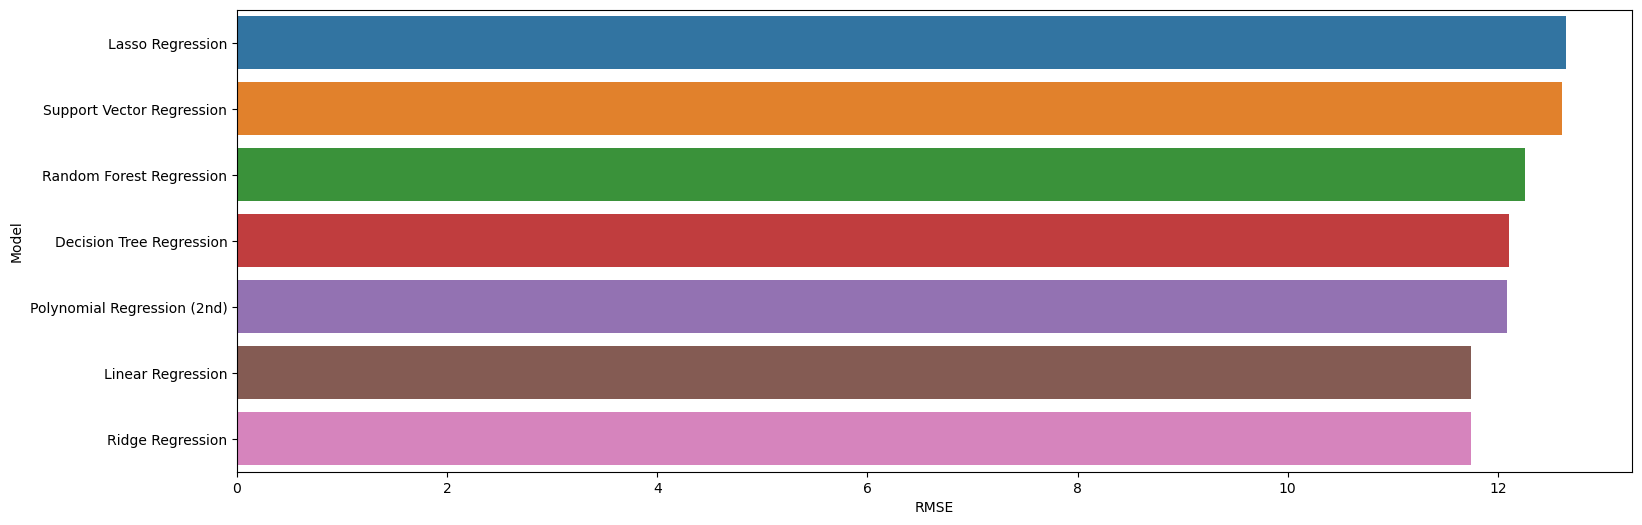

In [77]:
plt.figure(figsize=(18, 6))
plt.subplot(111)  
predict.sort_values(['RMSE'], ascending=False, inplace=True)
sns.barplot(x='RMSE', y='Model', data=predict)
plt.show()

c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


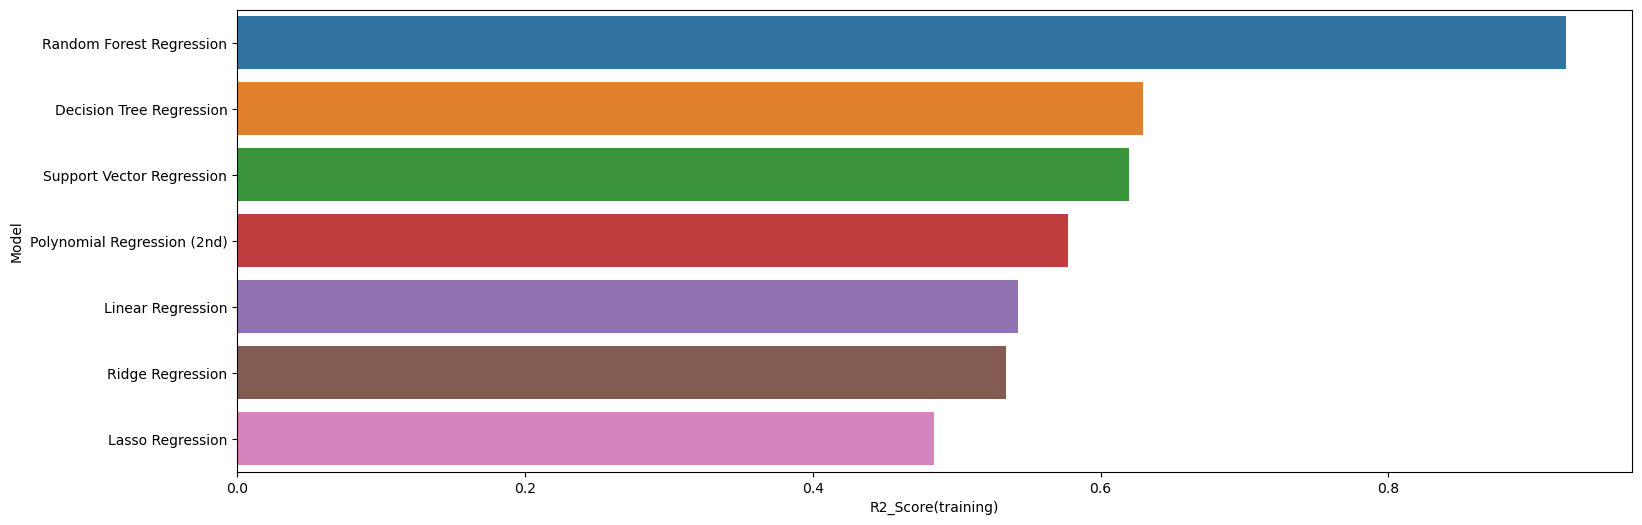

c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Victo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


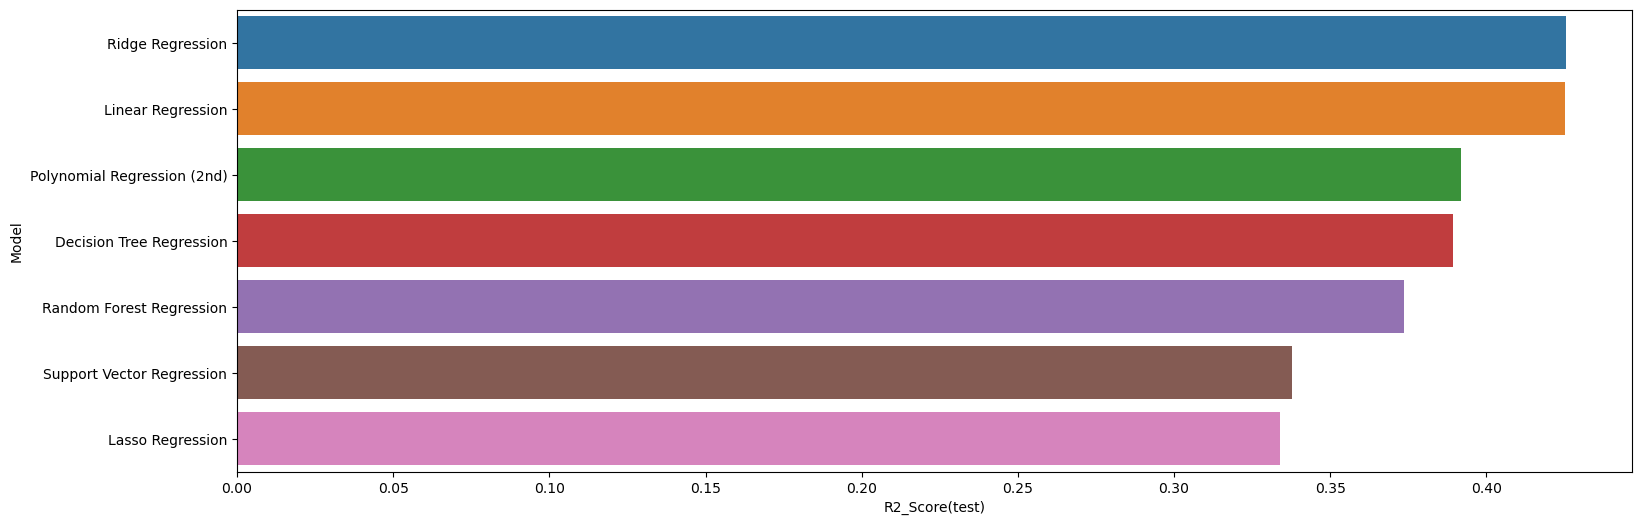

In [80]:
plt.figure(figsize=(18, 6))
plt.subplot(111)  
predict.sort_values(['R2_Score(training)'], ascending=False, inplace=True)
sns.barplot(x='R2_Score(training)', y='Model', data=predict)
plt.show()

plt.figure(figsize=(18, 6))
plt.subplot(111)  
predict.sort_values(['R2_Score(test)'], ascending=False, inplace=True)
sns.barplot(x='R2_Score(test)', y='Model', data=predict)
plt.show()